#Introducción
Platzi -Escuela de Ciencia de Datos 

*Análisis de Series de Tiempo (TSA)*

Obtendremos la información de la siguiente página : https://www.quandl.com/

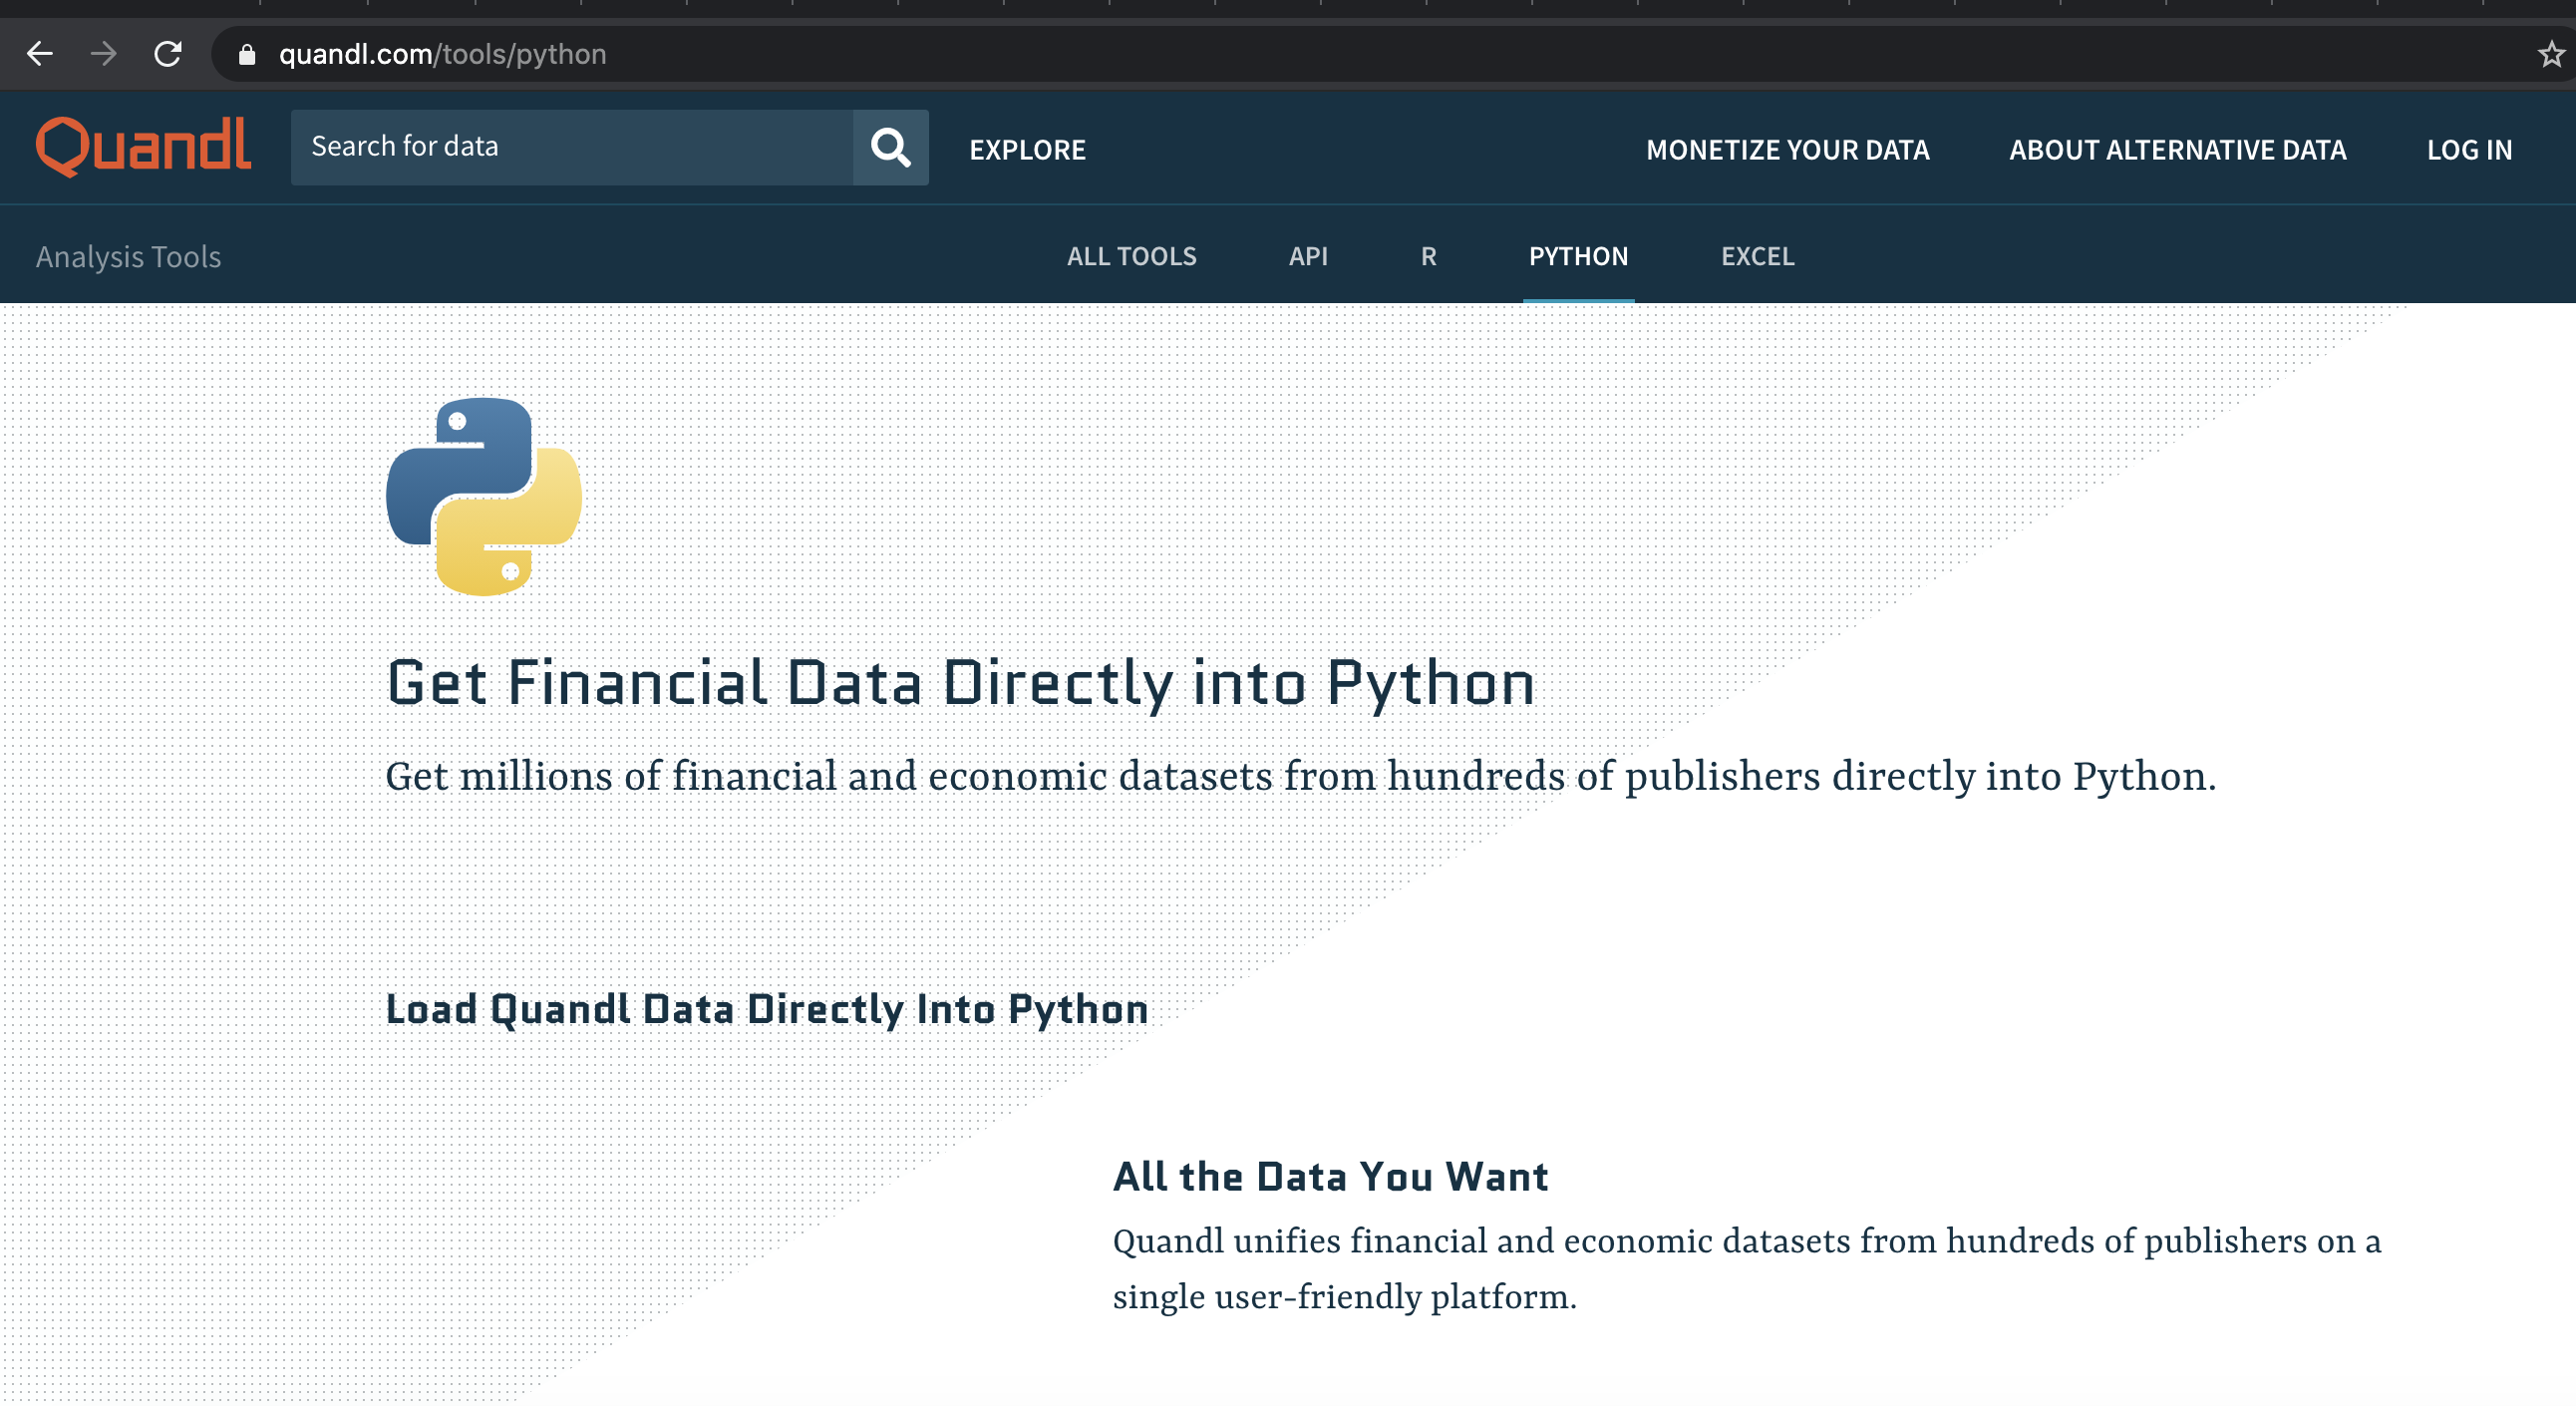

In [ ]:
!pip install quandl

In [ ]:
import quandl
QUANDL_API_KEY = '4sLKuvo8LszEsAF1Kqgr'  # Your Quandl key here
quandl.ApiConfig.api_key = QUANDL_API_KEY

In [ ]:
mydata = quandl.get("FRED/GDP")


In [ ]:
mydata

Value
Date                 
1947-01-01    243.164
1947-04-01    245.968
1947-07-01    249.585
1947-10-01    259.745
1948-01-01    265.742
...               ...
2020-10-01  21477.597
2021-01-01  22038.226
2021-04-01  22740.959
2021-07-01  23202.344
2021-10-01  23992.355

[300 rows x 1 columns]

In [22]:
df = quandl.get('CHRIS/CME_GC1', column_index=6, collapse='weekly', start_date='2010-01-01')

In [20]:
df['Settle'].resample('MS').ffill().dropna() #agrupamiento por mes  

Date
2010-02-01    1083.0
2010-03-01    1118.9
2010-04-01    1104.3
2010-05-01    1153.1
2010-06-01    1212.2
               ...  
2021-03-01    1731.6
2021-04-01    1734.7
2021-05-01    1777.8
2021-06-01    1902.5
2021-07-01    1776.6
Freq: MS, Name: Settle, Length: 138, dtype: float64

In [ ]:
df_settle = df['Settle'].resample('MS').ffill().dropna() #agrupamiento por mes  

In [ ]:
df_rolling = df_settle.rolling(3) #ventana dinámica 
df_mean = df_rolling.mean() #media  
df_std = df_rolling.std() # desviación estándar


In [ ]:
import matplotlib.pyplot as plt

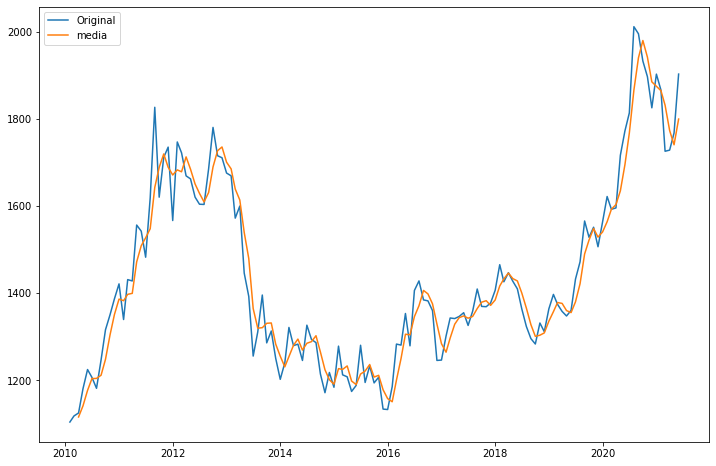

In [ ]:
  plt.figure(figsize=(12, 8))
  plt.plot(df_settle, label='Original')
  plt.plot(df_mean, label='media')
  plt.legend()

In [ ]:
#descomposición 
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
decompose_result = seasonal_decompose(df.dropna(), freq=12) #  12 es el número de periodos 
df_trend = decompose_result.trend 
df_season = decompose_result.seasonal
df_residual = decompose_result.resid



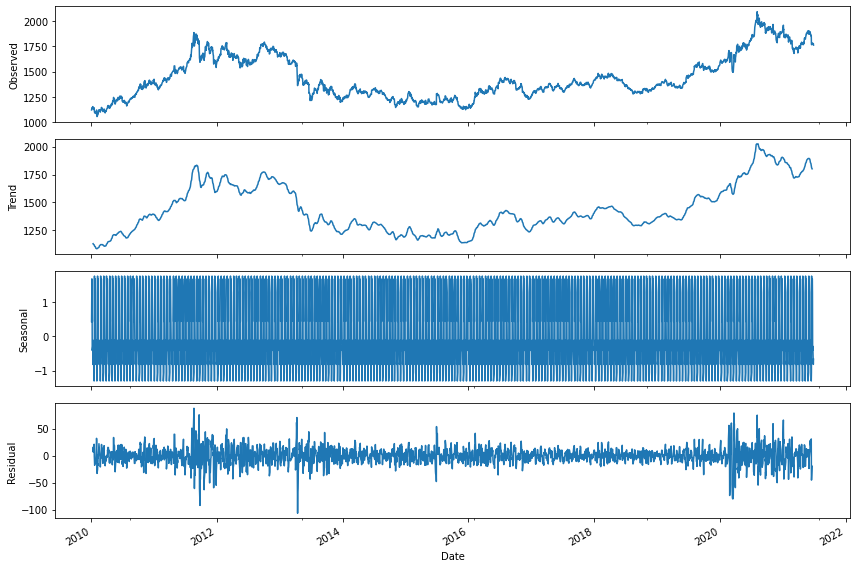

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
fig = decompose_result.plot()

SARIMAX - Predicción de los valores futuros 


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

In [ ]:
#determinar si es estacionaria Dickey-Fuller Test

result = adfuller(df['Settle'])


In [ ]:

print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

p-value: 0.39693245659615073
Critical Values:
	1%: -3.43262498927583
	5%: -2.8625451360824843
	10%: -2.5673050630393703


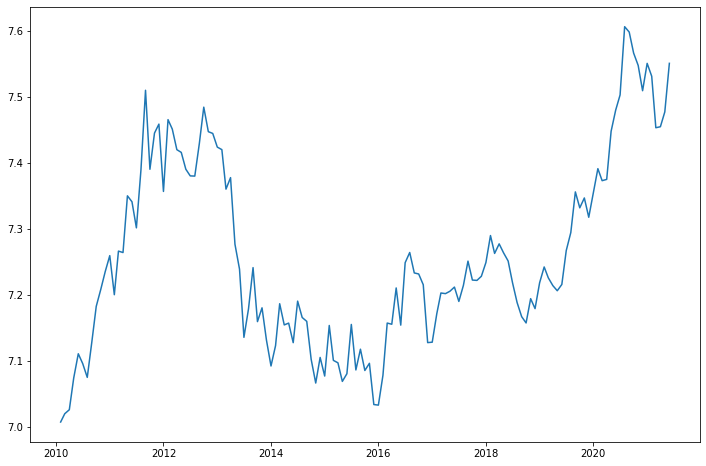

In [ ]:
df_log = np.log(df_settle)
plt.plot(df_log)

In [ ]:
rolling_mean = df_log.rolling(window=12).mean()
df_mean = df_log - rolling_mean
df_mean.dropna(inplace=True)